# Building a Machine Learning model to predict the date of payment of an invoice.


In [5]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import seaborn as sns
import math

In [6]:
#Importing Data Set--> csv.csv
df = pd.read_csv('csv.csv')
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200726979,BJ'S in,2019-06-27 00:00:00,2019.0,1.929465e+09,2019-06-12,20190610,20190612,20190627.0,USD,RV,1.0,NaN,9222.81,20190612.0,NAA8,1.929465e+09,0
1,U001,0200799367,MCL associates,2019-10-30 00:00:00,2019.0,1.930008e+09,2019-10-13,20191012,20191013,20191028.0,USD,RV,1.0,NaN,1531.86,20191013.0,NAA8,1.930008e+09,0
2,U001,0200418007,AM trust,2019-02-28 00:00:00,2019.0,1.928765e+09,2019-02-12,20190208,20190212,20190227.0,USD,RV,1.0,NaN,34818.39,20190212.0,NAA8,1.928765e+09,0
3,U001,200772670,ASSOCIAT,2019-07-09 00:00:00,2019.0,1.929339e+09,2019-05-22,20190517,20190522,20190606.0,USD,RV,1.0,NaN,273.69,20190522.0,NAU5,1.929339e+09,0
4,U001,200769623,WAL-MAR llc,2020-01-13 00:00:00,2020.0,1.930332e+09,2020-01-01,20191229,20200101,20200116.0,USD,RV,1.0,NaN,16698.87,20200101.0,NAH4,1.930332e+09,0


# Data Pre-Processing and Filtering

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              45908 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [8]:
#Converting all date (present in float and object ) to datetime format
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')

In [9]:
#Saving a copy of test data for later purpose.
test_final=df.loc[df["clear_date"].isnull()].reset_index(drop=True)

In [10]:
#Resetting index.
test_final.reset_index(inplace = True)
test_final.drop(['index'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              45908 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  int64         
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

In [12]:
#Checking for the null values in invoice column.
df['invoice_id'].isna().sum()

0

In [13]:
#Dropping
df.drop('document_create_date',axis = 1, inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              45908 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date.1  50000 non-null  datetime64[ns]
 8   due_in_date             50000 non-null  datetime64[ns]
 9   invoice_currency        50000 non-null  object        
 10  document type           50000 non-null  object        
 11  posting_id              50000 non-null  float64       
 12  area_business           0 non-null      float6

In [15]:
df['delay'] = (df['clear_date']-df['due_in_date'])

In [16]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200726979,BJ'S in,2019-06-27,2019.0,1.929465e+09,2019-06-12,2019-06-12,2019-06-27,USD,RV,1.0,NaN,9222.81,2019-06-12,NAA8,1.929465e+09,0,0 days
1,U001,0200799367,MCL associates,2019-10-30,2019.0,1.930008e+09,2019-10-13,2019-10-13,2019-10-28,USD,RV,1.0,NaN,1531.86,2019-10-13,NAA8,1.930008e+09,0,2 days
2,U001,0200418007,AM trust,2019-02-28,2019.0,1.928765e+09,2019-02-12,2019-02-12,2019-02-27,USD,RV,1.0,NaN,34818.39,2019-02-12,NAA8,1.928765e+09,0,1 days
3,U001,200772670,ASSOCIAT,2019-07-09,2019.0,1.929339e+09,2019-05-22,2019-05-22,2019-06-06,USD,RV,1.0,NaN,273.69,2019-05-22,NAU5,1.929339e+09,0,33 days
4,U001,200769623,WAL-MAR llc,2020-01-13,2020.0,1.930332e+09,2020-01-01,2020-01-01,2020-01-16,USD,RV,1.0,NaN,16698.87,2020-01-01,NAH4,1.930332e+09,0,-3 days


In [17]:
df['delay'] = df['delay'].dt.days

In [18]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200726979,BJ'S in,2019-06-27,2019.0,1.929465e+09,2019-06-12,2019-06-12,2019-06-27,USD,RV,1.0,NaN,9222.81,2019-06-12,NAA8,1.929465e+09,0,0.0
1,U001,0200799367,MCL associates,2019-10-30,2019.0,1.930008e+09,2019-10-13,2019-10-13,2019-10-28,USD,RV,1.0,NaN,1531.86,2019-10-13,NAA8,1.930008e+09,0,2.0
2,U001,0200418007,AM trust,2019-02-28,2019.0,1.928765e+09,2019-02-12,2019-02-12,2019-02-27,USD,RV,1.0,NaN,34818.39,2019-02-12,NAA8,1.928765e+09,0,1.0
3,U001,200772670,ASSOCIAT,2019-07-09,2019.0,1.929339e+09,2019-05-22,2019-05-22,2019-06-06,USD,RV,1.0,NaN,273.69,2019-05-22,NAU5,1.929339e+09,0,33.0
4,U001,200769623,WAL-MAR llc,2020-01-13,2020.0,1.930332e+09,2020-01-01,2020-01-01,2020-01-16,USD,RV,1.0,NaN,16698.87,2020-01-01,NAH4,1.930332e+09,0,-3.0


In [19]:
df['delay'].describe()

count    45908.000000
mean         0.847608
std         10.874203
min        -83.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        268.000000
Name: delay, dtype: float64

In [20]:
df.rename(columns={'buisness_year':'business_year'},inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              45908 non-null  datetime64[ns]
 4   business_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date.1  50000 non-null  datetime64[ns]
 8   due_in_date             50000 non-null  datetime64[ns]
 9   invoice_currency        50000 non-null  object        
 10  document type           50000 non-null  object        
 11  posting_id              50000 non-null  float64       
 12  area_business           0 non-null      float6

In [22]:
df.groupby('posting_id').count()

,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
posting_id,,,,,,,,,,,,,,,,,,
1.0,50000,50000,50000,45908,50000,50000,50000,50000,50000,50000,50000,0,50000,50000,50000,50000,50000,45908


In [23]:
df.groupby('document type').count()

,business_code,cust_number,name_customer,clear_date,business_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
document type,,,,,,,,,,,,,,,,,,
RV,50000,50000,50000,45908,50000,50000,50000,50000,50000,50000,50000,0,50000,50000,50000,50000,50000,45908


In [24]:
#Removing Constant Columns ->> Columns which have the same value in the enitre dataset
unique_cols =  [x for x in df.columns if df[x].nunique()==1] 
print(unique_cols)
df.drop(unique_cols,axis=1,inplace=True)
df.columns

['document type', 'posting_id']


Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'business_year', 'doc_id', 'posting_date', 'document_create_date.1',
       'due_in_date', 'invoice_currency', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen',
       'delay'],
      dtype='object')

In [25]:
#For Removing Null Column
df['area_business'].isna().count()

50000

In [21]:
df.drop('area_business',axis = 1, inplace = True)

In [22]:
#Checking for same row values in ('doc_id' and 'invoice_id')
print((df['doc_id'] - df['invoice_id']).sum())

0.0


In [23]:
#Checking for same row values in ('posting_date' and 'doc_create_date')
print((df['posting_date'] - df['document_create_date.1']).sum())

0 days 00:00:00


In [24]:
df.drop('doc_id',axis = 1, inplace = True)
df.drop('posting_date',axis = 1, inplace = True)

In [25]:
df.head()

,business_code,cust_number,name_customer,clear_date,business_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200726979,BJ'S in,2019-06-27,2019.0,2019-06-12,2019-06-27,USD,9222.81,2019-06-12,NAA8,1.929465e+09,0,0.0
1,U001,0200799367,MCL associates,2019-10-30,2019.0,2019-10-13,2019-10-28,USD,1531.86,2019-10-13,NAA8,1.930008e+09,0,2.0
2,U001,0200418007,AM trust,2019-02-28,2019.0,2019-02-12,2019-02-27,USD,34818.39,2019-02-12,NAA8,1.928765e+09,0,1.0
3,U001,200772670,ASSOCIAT,2019-07-09,2019.0,2019-05-22,2019-06-06,USD,273.69,2019-05-22,NAU5,1.929339e+09,0,33.0
4,U001,200769623,WAL-MAR llc,2020-01-13,2020.0,2020-01-01,2020-01-16,USD,16698.87,2020-01-01,NAH4,1.930332e+09,0,-3.0


In [26]:
#splitting the dataset into train data and test data
test=df.loc[df["clear_date"].isnull()].reset_index(drop=True)
train=df.loc[df["clear_date"].notnull()].reset_index(drop=True)

In [27]:
print(train.shape)

(45908, 14)


In [28]:
# Removing anomalies for train set
train=train[((train['document_create_date.1']<=train['baseline_create_date']) & (train['baseline_create_date']<=train['due_in_date']))|((train['document_create_date.1']<=train['baseline_create_date']) & (train['baseline_create_date']<=train['clear_date']))]

# Removing anomalies for test set
test=test[((test['document_create_date.1']<=test['baseline_create_date']) & (test['baseline_create_date']<=test['due_in_date']))|(test['document_create_date.1']<=test['baseline_create_date'])]


In [29]:
# Removing anomalies for test_final set
test_final=test_final[((test_final['document_create_date.1']<=test_final['baseline_create_date']) & (test_final['baseline_create_date']<=test_final['due_in_date']))|(test_final['document_create_date.1']<=test_final['baseline_create_date'])]

In [30]:
print(train.shape)

(43870, 14)


In [31]:
train

,business_code,cust_number,name_customer,clear_date,business_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200726979,BJ'S in,2019-06-27,2019.0,2019-06-12,2019-06-27,USD,9222.81,2019-06-12,NAA8,1.929465e+09,0,0.0
1,U001,0200799367,MCL associates,2019-10-30,2019.0,2019-10-13,2019-10-28,USD,1531.86,2019-10-13,NAA8,1.930008e+09,0,2.0
2,U001,0200418007,AM trust,2019-02-28,2019.0,2019-02-12,2019-02-27,USD,34818.39,2019-02-12,NAA8,1.928765e+09,0,1.0
3,U001,200772670,ASSOCIAT,2019-07-09,2019.0,2019-05-22,2019-06-06,USD,273.69,2019-05-22,NAU5,1.929339e+09,0,33.0
4,U001,200769623,WAL-MAR llc,2020-01-13,2020.0,2020-01-01,2020-01-16,USD,16698.87,2020-01-01,NAH4,1.930332e+09,0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45903,U001,0200726979,BJ'S trust,2019-05-20,2019.0,2019-04-26,2019-05-11,USD,171.93,2019-04-26,NAA8,1.929206e+09,0,9.0
45904,U001,0200707822,PUBLI in,2019-07-29,2019.0,2019-07-12,2019-07-27,USD,139581.28,2019-07-12,NAA8,1.929608e+09,0,2.0
45905,U001,0200782001,GORDO corporation,2019-04-16,2019.0,2019-04-01,2019-04-16,USD,39407.52,2019-04-01,NAA8,1.929062e+09,0,0.0
45906,U001,0200782669,SYGMA associates,2019-12-23,2019.0,2019-12-05,2019-12-20,USD,28095.37,2019-12-05,NAA8,1.930212e+09,0,3.0


In [32]:
train.isnull().sum()
#No need to for null imputation

business_code             0
cust_number               0
name_customer             0
clear_date                0
business_year             0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
delay                     0
dtype: int64

In [33]:
#Removing Constant Columns ->> Columns which have the same value in the enitre dataset
train.drop(['isOpen'], axis=1, inplace=True)
test.drop(['isOpen'], axis=1, inplace=True)

In [34]:
#Sorting the train_set according to 'document_create_date.1' to slice properly into val1 and val2.
train.sort_values(by=['document_create_date.1'], inplace=True)

In [35]:
train.shape

(43870, 13)

<AxesSubplot:>

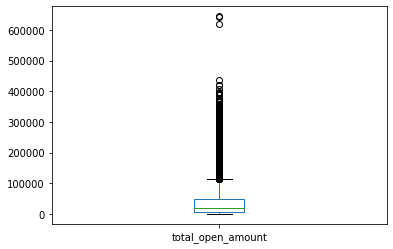

In [36]:
#Box Plot to check the outliers.
train.boxplot(column =['total_open_amount'], grid = False)
#There are lot of outliers , nothing should be dropped, if outliers dropped then it our lots of data will be lost.

In [37]:
#Slicing the data set to validation_set1 and validation_set2 and train_set
val1 = train.iloc[30710:37290] #70-->85
val2 = train.iloc[37290:] #85-->100
train = train.iloc[:30710] #Upto 70

In [38]:
val1.shape

(6580, 13)

In [39]:
val2.shape

(6580, 13)

In [40]:
train.shape

(30710, 13)

In [41]:
train

,business_code,cust_number,name_customer,clear_date,business_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
470,U001,0200759878,SA corporation,2019-01-22,2019.0,2018-12-30,2019-01-14,USD,14380.16,2018-12-30,NAH4,1.928540e+09,8.0
42816,U001,0100001196,DOLLAR,2019-01-14,2019.0,2018-12-30,2019-01-14,USD,48848.38,2018-12-30,NAA8,1.928538e+09,0.0
8167,U001,0200762301,C&S WH systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,100575.77,2018-12-30,NAC6,1.928538e+09,1.0
23048,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,38457.44,2018-12-30,NAH4,1.928543e+09,-5.0
34609,U001,0200726979,BJ'S llc,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,240.86,2018-12-30,NAA8,1.928538e+09,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,U001,0200769623,WAL-MAR associates,2019-10-18,2019.0,2019-10-07,2019-10-22,USD,14865.66,2019-10-07,NAH4,1.929973e+09,-4.0
11414,U001,0200726979,BJ'S trust,2019-10-22,2019.0,2019-10-07,2019-10-22,USD,334.30,2019-10-07,NAA8,1.929974e+09,0.0
3175,CA02,0140104409,LOB,2019-10-18,2019.0,2019-10-07,2019-10-17,CAD,58018.55,2019-10-07,CA10,2.960584e+09,1.0
8938,U001,0200759878,SA us,2019-10-23,2019.0,2019-10-07,2019-10-22,USD,29137.69,2019-10-07,NAH4,1.929970e+09,1.0


In [42]:
#Resetting index according to sorting of 'document_create_date.1'.
train.reset_index(inplace=True)
val1.reset_index(inplace=True)
val2.reset_index(inplace=True)

# EDA and Feature Engineering

In [43]:
# target encoding 'name_customer' column

from collections import defaultdict

name = {}
name = (train.groupby('name_customer')['delay'].mean()).to_dict()

def delay_mean():
    return train['delay'].mean()

cust_name = {}
cust_name = defaultdict(delay_mean)

for i,j in name.items():
    cust_name[i] = j
    
train['name_customer'] = train['name_customer'].map(cust_name)
val1['name_customer'] = val1['name_customer'].map(cust_name)
val2['name_customer'] = val2['name_customer'].map(cust_name)
test['name_customer'] = test['name_customer'].map(cust_name)

In [44]:
# target encoding 'cust_number' column

from collections import defaultdict

name = {}
name = (train.groupby('cust_number')['delay'].mean()).to_dict()

def delay_mean():
    return train['delay'].mean()

cust_num = {}
cust_num = defaultdict(delay_mean)

for i,j in name.items():
    cust_num[i] = j
    
train['cust_number'] = train['cust_number'].map(cust_num)
val1['cust_number'] = val1['cust_number'].map(cust_num)
val2['cust_number'] = val2['cust_number'].map(cust_num)
test['cust_number'] = test['cust_number'].map(cust_num)

In [45]:
# one hot encoding cust_payment_terms column
code = {}
c=0
for i in train['cust_payment_terms']:
    if i not in code:
        code[i] = c
        c += 1
    
train['cust_payment_terms'] = train['cust_payment_terms'].map(code)
val1['cust_payment_terms'] = val1['cust_payment_terms'].map(code)
val2['cust_payment_terms'] = val2['cust_payment_terms'].map(code)
test['cust_payment_terms'] = test['cust_payment_terms'].map(code)

In [46]:
train.head()

,index,business_code,cust_number,name_customer,clear_date,business_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,470,U001,1.025332,0.431579,2019-01-22,2019.0,2018-12-30,2019-01-14,USD,14380.16,2018-12-30,0,1.928540e+09,8.0
1,42816,U001,0.725806,1.000000,2019-01-14,2019.0,2018-12-30,2019-01-14,USD,48848.38,2018-12-30,1,1.928538e+09,0.0
2,8167,U001,0.514595,1.391304,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,100575.77,2018-12-30,2,1.928538e+09,1.0
3,23048,U001,-2.044448,-1.592375,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,38457.44,2018-12-30,0,1.928543e+09,-5.0
4,34609,U001,0.876585,0.991379,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,240.86,2018-12-30,1,1.928538e+09,1.0


In [49]:
train.drop('index',axis = 1, inplace = True)
val1.drop('index',axis = 1, inplace = True)
val2.drop('index',axis = 1, inplace = True)

In [50]:
#Converting CAD to USD, for dropping the invoice currency column.
from forex_python.converter import CurrencyRates 

c = CurrencyRates()
train.loc[(train.invoice_currency != 'USD'), ['total_open_amount']] *= c.get_rate('CAD', 'USD')
test.loc[(test.invoice_currency != 'USD'), ['total_open_amount']] *= c.get_rate('CAD', 'USD')
val1.loc[(val1.invoice_currency != 'USD'), ['total_open_amount']] *= c.get_rate('CAD', 'USD')
val2.loc[(val2.invoice_currency != 'USD'), ['total_open_amount']] *= c.get_rate('CAD', 'USD')

In [51]:
# one hot encoding invoice_currency column

curr = {}
c=0
for i in train['invoice_currency']:
    if i not in curr:
        curr[i] = c
        c += 1

train['invoice_currency'] = train['invoice_currency'].map(curr)
val1['invoice_currency'] = val1['invoice_currency'].map(curr)
val2['invoice_currency'] = val2['invoice_currency'].map(curr)
test['invoice_currency'] = test['invoice_currency'].map(curr)

In [52]:
# one hot encoding business_code column
code = {}
c=0
for i in train['business_code']:
    if i not in code:
        code[i] = c
        c += 1
    
train['business_code'] = train['business_code'].map(code)
val1['business_code'] = val1['business_code'].map(code)
val2['business_code'] = val2['business_code'].map(code)
test['business_code'] = test['business_code'].map(code)

In [53]:
#Dropping 'invoice_currency'
train.drop('invoice_currency',axis = 1, inplace = True)
test.drop('invoice_currency',axis = 1, inplace = True)
val1.drop('invoice_currency',axis = 1, inplace = True)
val2.drop('invoice_currency',axis = 1, inplace = True)

In [54]:
train.head()

,business_code,cust_number,name_customer,clear_date,business_year,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,0,1.025332,0.431579,2019-01-22,2019.0,2018-12-30,2019-01-14,14380.16,2018-12-30,0,1.928540e+09,8.0
1,0,0.725806,1.000000,2019-01-14,2019.0,2018-12-30,2019-01-14,48848.38,2018-12-30,1,1.928538e+09,0.0
2,0,0.514595,1.391304,2019-01-15,2019.0,2018-12-30,2019-01-14,100575.77,2018-12-30,2,1.928538e+09,1.0
3,0,-2.044448,-1.592375,2019-01-09,2019.0,2018-12-30,2019-01-14,38457.44,2018-12-30,0,1.928543e+09,-5.0
4,0,0.876585,0.991379,2019-01-15,2019.0,2018-12-30,2019-01-14,240.86,2018-12-30,1,1.928538e+09,1.0


In [55]:
# calculating difference between the date columns

train['due_create'] = (train['due_in_date'] - train['document_create_date.1']).dt.days
train['create_base'] = (train['document_create_date.1'] - train['baseline_create_date']).dt.days
train['due_base'] = (train['due_in_date'] - train['baseline_create_date']).dt.days

val1['due_create'] = (val1['due_in_date'] - val1['document_create_date.1']).dt.days
val1['create_base'] = (val1['document_create_date.1'] - val1['baseline_create_date']).dt.days
val1['due_base'] = (val1['due_in_date'] - val1['baseline_create_date']).dt.days

val2['due_create'] = (val2['due_in_date'] - val2['document_create_date.1']).dt.days
val2['create_base'] = (val2['document_create_date.1'] - val2['baseline_create_date']).dt.days
val2['due_base'] = (val2['due_in_date'] - val2['baseline_create_date']).dt.days

test['due_create'] = (test['due_in_date'] - test['document_create_date.1']).dt.days
test['create_base'] = (test['document_create_date.1'] - test['baseline_create_date']).dt.days
test['due_base'] = (test['due_in_date'] - test['baseline_create_date']).dt.days

In [56]:
# Extracting month from each of the date columns

train['doc_create_month'] = train['document_create_date.1'].dt.month
train['due_month'] = train['due_in_date'].dt.month
train['base_create_month'] = train['baseline_create_date'].dt.month

val1['doc_create_month'] = val1['document_create_date.1'].dt.month
val1['due_month'] = val1['due_in_date'].dt.month
val1['base_create_month'] = val1['baseline_create_date'].dt.month

val2['doc_create_month'] = val2['document_create_date.1'].dt.month
val2['due_month'] = val2['due_in_date'].dt.month
val2['base_create_month'] = val2['baseline_create_date'].dt.month

test['doc_create_month'] = test['document_create_date.1'].dt.month
test['due_month'] = test['due_in_date'].dt.month
test['base_create_month'] = test['baseline_create_date'].dt.month

In [57]:
# keeping the invoice_id and due_in_date columns of the train, validation and test set in a separate dataframe

f_train = pd.DataFrame(columns=['invoice_id', 'due_in_date'])
f_val1 = pd.DataFrame(columns=['invoice_id', 'due_in_date'])
f_val2 = pd.DataFrame(columns=['invoice_id', 'due_in_date'])
f_test = pd.DataFrame(columns=['invoice_id', 'due_in_date'])

f_train['invoice_id'] = train['invoice_id']
f_val1['invoice_id'] = val1['invoice_id']
f_val2['invoice_id'] = val2['invoice_id']
f_test['invoice_id'] = test['invoice_id']

f_train['due_in_date'] = train['due_in_date']
f_val1['due_in_date'] = val1['due_in_date']
f_val2['due_in_date'] = val2['due_in_date']
f_test['due_in_date'] = test['due_in_date']

In [58]:
# Extracting year from each of the date columns

train['doc_create_year'] = train['document_create_date.1'].dt.year
train['due_year'] = train['due_in_date'].dt.year
train['base_create_year'] = train['baseline_create_date'].dt.year

val1['doc_create_year'] = val1['document_create_date.1'].dt.year
val1['due_year'] = val1['due_in_date'].dt.year
val1['base_create_year'] = val1['baseline_create_date'].dt.year

val2['doc_create_year'] = val2['document_create_date.1'].dt.year
val2['due_year'] = val2['due_in_date'].dt.year
val2['base_create_year'] = val2['baseline_create_date'].dt.year

test['doc_create_year'] = test['document_create_date.1'].dt.year
test['due_year'] = test['due_in_date'].dt.year
test['base_create_year'] = test['baseline_create_date'].dt.year


In [59]:
train.corr()['delay'].sort_values(ascending = False)

delay                 1.000000
name_customer         0.705598
cust_number           0.686608
business_code         0.147303
invoice_id            0.126775
base_create_year     -0.003554
doc_create_year      -0.003937
base_create_month    -0.015556
doc_create_month     -0.016155
total_open_amount    -0.025625
due_year             -0.039793
due_month            -0.043088
cust_payment_terms   -0.052332
create_base          -0.053419
due_create           -0.197066
due_base             -0.202567
business_year              NaN
Name: delay, dtype: float64

<AxesSubplot:>

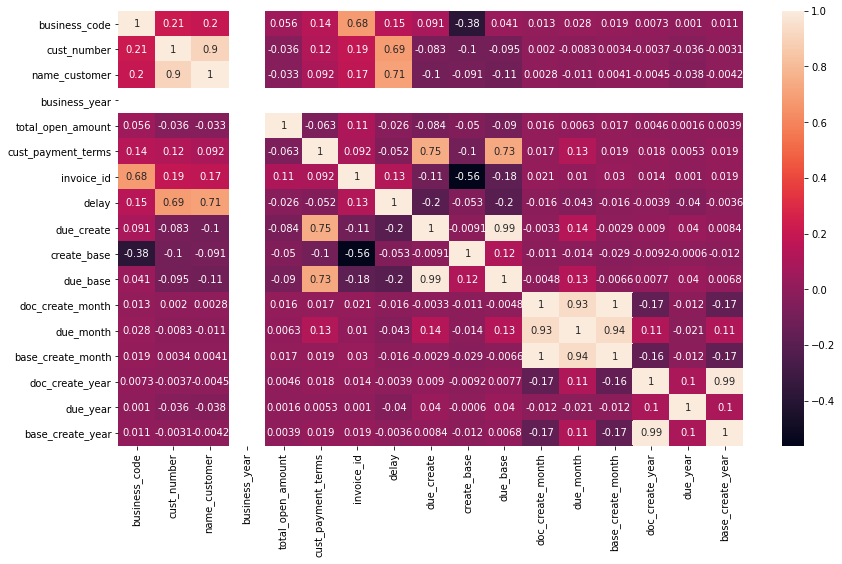

In [60]:
#visualisation using heat_map
corr=train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

In [61]:
#Dropping below columns after extracting the useful features.
train.drop(['business_year','cust_number','invoice_id','doc_create_year','due_year','base_create_year','clear_date','due_in_date','document_create_date.1','baseline_create_date'],axis = 1, inplace = True)
test.drop(['business_year','cust_number','invoice_id','doc_create_year','due_year','base_create_year','clear_date','due_in_date','document_create_date.1','baseline_create_date','delay'],axis = 1, inplace = True)
val1.drop(['business_year','cust_number','invoice_id','doc_create_year','due_year','base_create_year','clear_date','due_in_date','document_create_date.1','baseline_create_date'],axis = 1, inplace = True)
val2.drop(['business_year','cust_number','invoice_id','doc_create_year','due_year','base_create_year','clear_date','due_in_date','document_create_date.1','baseline_create_date'],axis = 1, inplace = True)

In [62]:
train.isna().sum()

business_code         0
name_customer         0
total_open_amount     0
cust_payment_terms    0
delay                 0
due_create            0
create_base           0
due_base              0
doc_create_month      0
due_month             0
base_create_month     0
dtype: int64

In [63]:
val1.isna().sum()

business_code         0
name_customer         0
total_open_amount     0
cust_payment_terms    3
delay                 0
due_create            0
create_base           0
due_base              0
doc_create_month      0
due_month             0
base_create_month     0
dtype: int64

In [64]:
val2.isna().sum()

business_code         0
name_customer         0
total_open_amount     0
cust_payment_terms    5
delay                 0
due_create            0
create_base           0
due_base              0
doc_create_month      0
due_month             0
base_create_month     0
dtype: int64

In [66]:
#Dropping the null values
val1.dropna(inplace=True)
val2.dropna(inplace=True)

In [67]:
train.shape

(30710, 11)

<AxesSubplot:>

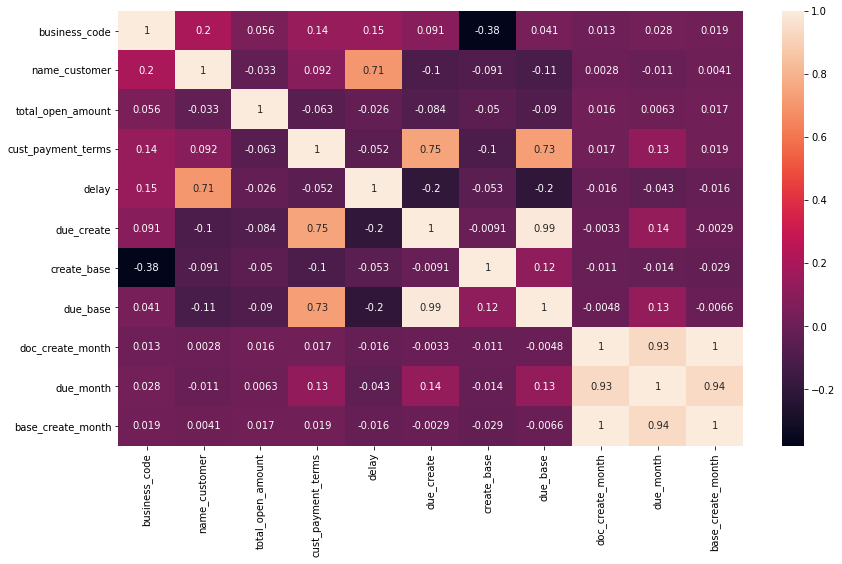

In [68]:
#visualisation using heatmap
corr=train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

# Feature Selection

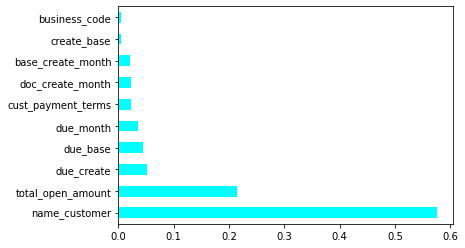

In [69]:
# Displaying important features using Random Forest Regressor

def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(n_estimators=120)
    model.fit(x_train, y_train)
    importances = model.feature_importances_
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')
    final_df = final_df.sort_values('Importances',ascending=False)
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(10).plot(kind='barh',color='cyan')  
    return final_df
X_train = train[['business_code', 'name_customer', 'total_open_amount', 'cust_payment_terms', 'due_create', 'create_base', 'due_base', 'doc_create_month', 'due_month', 'base_create_month']]
Y_train = train[['delay']]
feature_importance=tree_based_feature_importance(X_train,Y_train)


In [70]:
train.corr()['delay'].sort_values(ascending = False)

delay                 1.000000
name_customer         0.705598
business_code         0.147303
base_create_month    -0.015556
doc_create_month     -0.016155
total_open_amount    -0.025625
due_month            -0.043088
cust_payment_terms   -0.052332
create_base          -0.053419
due_create           -0.197066
due_base             -0.202567
Name: delay, dtype: float64

In [71]:
x_train = train.loc[:, ['business_code', 'due_create', 'name_customer', 'due_base']] 
y_train = train['delay']

x_val1 = val1.loc[:, ['business_code', 'due_create', 'name_customer', 'due_base']] 
y_val1 = val1['delay']

x_val2 = val2.loc[:, ['business_code', 'due_create', 'name_customer', 'due_base']]
y_val2 = val2['delay']

x_test = test.loc[:, ['business_code', 'due_create', 'name_customer', 'due_base']]


In [72]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scalerx = StandardScaler().fit(x_train)

x_train = scalerx.transform(x_train)

x_val1 = scalerx.transform(x_val1)

x_val2 = scalerx.transform(x_val2)

x_test = scalerx.transform(x_test)


# Modeling

In [73]:
# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Fitting and checking model accuracy with validation set 1

In [74]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
R2_Score = []
Algorithm = []

In [75]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(x_train, y_train)

# Predicting the val1 Results
predicted = clf.predict(x_val1)

In [76]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val1, predicted))
R2_Score.append(r2_score(y_val1, predicted))

In [77]:

print("RMSE: ", math.sqrt(mean_squared_error(y_val1, predicted)))
print("Score: ", (clf.score(x_val1, y_val1))*100, "%")


RMSE:  5.955796771179425
Score:  25.16704914289075 %


In [78]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(x_train, y_train)

# Predicting the val1 Results
predicted = clf.predict(x_val1)

In [79]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val1, predicted))
R2_Score.append(r2_score(y_val1, predicted))

In [80]:
print("RMSE: ", math.sqrt(mean_squared_error(y_val1, predicted)))
print("Score: ", (clf.score(x_val1, y_val1))*100, "%")

RMSE:  5.3354202546371905
Score:  39.94483046902112 %


In [81]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)

# Predicting the val1 Results
predicted = clf.predict(x_val1)

In [82]:
MSE_Score.append(mean_squared_error(y_val1, predicted))
R2_Score.append(r2_score(y_val1, predicted))

In [83]:
print("RMSE: ", math.sqrt(mean_squared_error(y_val1, predicted)))
print("Score: ", (clf.score(x_val1, y_val1))*100, "%")

RMSE:  5.888974904695039
Score:  26.836825958887555 %


In [84]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(x_train, y_train)

# Predicting the val1 Results
predicted = clf.predict(x_val1)

In [85]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val1, predicted))
R2_Score.append(r2_score(y_val1, predicted))

In [86]:
print("RMSE: ", math.sqrt(mean_squared_error(y_val1, predicted)))
print("Score: ", (clf.score(x_val1, y_val1))*100, "%")

RMSE:  5.6755001051818335
Score:  32.045002143488944 %


In [87]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(x_train, y_train)

# Predicting the val1 Results
predicted = clf.predict(x_val1)

In [88]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val1, predicted))
R2_Score.append(r2_score(y_val1, predicted))

In [89]:
print("RMSE: ", math.sqrt(mean_squared_error(y_val1, predicted)))
print("Score: ", (clf.score(x_val1, y_val1))*100, "%")

RMSE:  5.611252557159647
Score:  33.57481637480745 %


In [90]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [91]:
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,35.471515,0.251670
1,Support Vector Regression,28.466709,0.399448
2,Decision Tree Regressor,34.680025,0.268368
3,Random Forest Regressor,32.211301,0.320450
4,XGB Regressor,31.486155,0.335748


# Fitting and checking model accuracy with validation set 2

In [92]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
R2_Score = []
Algorithm = []

In [93]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(x_train, y_train)

# Predicting the val2 Results
predicted = clf.predict(x_val2)

In [94]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val2, predicted))
R2_Score.append(r2_score(y_val2, predicted))

In [95]:

print("RMSE: ", math.sqrt(mean_squared_error(y_val2, predicted)))
print("Score: ", (clf.score(x_val2, y_val2))*100, "%")


RMSE:  7.47686743951441
Score:  39.881569125603754 %


In [96]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(x_train, y_train)

# Predicting the val2 Results
predicted = clf.predict(x_val2)

In [97]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val2, predicted))
R2_Score.append(r2_score(y_val2, predicted))

In [98]:
print("RMSE: ", math.sqrt(mean_squared_error(y_val2, predicted)))
print("Score: ", (clf.score(x_val2, y_val2))*100, "%")

RMSE:  7.41378348228354
Score:  40.89175405742844 %


In [99]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)

# Predicting the val2 Results
predicted = clf.predict(x_val2)

In [100]:
MSE_Score.append(mean_squared_error(y_val2, predicted))
R2_Score.append(r2_score(y_val2, predicted))

In [101]:
print("RMSE: ", math.sqrt(mean_squared_error(y_val2, predicted)))
print("Score: ", (clf.score(x_val2, y_val2))*100, "%")

RMSE:  7.532056467567786
Score:  38.99078888202213 %


In [102]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(x_train, y_train)

# Predicting the val2 Results
predicted = clf.predict(x_val2)

In [103]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val2, predicted))
R2_Score.append(r2_score(y_val2, predicted))

In [104]:
print("RMSE: ", math.sqrt(mean_squared_error(y_val2, predicted)))
print("Score: ", (clf.score(x_val2, y_val2))*100, "%")

RMSE:  7.381909522491092
Score:  41.39890776750743 %


In [105]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(x_train, y_train)

# Predicting the Validation2 Results
predicted = clf.predict(x_val2)

In [106]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val2, predicted))
R2_Score.append(r2_score(y_val2, predicted))

In [107]:
print("RMSE: ", math.sqrt(mean_squared_error(y_val2, predicted)))
print("Score: ", (clf.score(x_val2, y_val2))*100, "%")

RMSE:  7.232006682140051
Score:  43.7547421159881 %


In [108]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [109]:
#Score and Error
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,55.903547,0.398816
1,Support Vector Regression,54.964186,0.408918
2,Decision Tree Regressor,56.731875,0.389908
3,Random Forest Regressor,54.492588,0.413989
4,XGB Regressor,52.301921,0.437547


# Feeding test data into the trained model and getting the predicted delay.

In [110]:
# Fitting SVR to the Test Set
clf = SVR()
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_test)

In [111]:
#Adding the predicted delay colunm to the test_final data set.
test_final['delay'] = predicted

In [112]:
len(predicted)

3911

In [113]:
test.head()

,business_code,name_customer,total_open_amount,cust_payment_terms,due_create,create_base,due_base,doc_create_month,due_month,base_create_month
0,0,-2.308036,542.11,0.0,15,0,15,3,4,3
1,0,-0.938272,106298.31,2.0,15,0,15,4,4,4
2,0,3.333333,24303.64,1.0,15,0,15,5,5,5
3,0,1.755556,74761.35,1.0,15,0,15,3,4,3
4,0,-2.178674,3983.68,0.0,15,0,15,4,4,4


In [114]:
test_final.shape

(3911, 20)

In [121]:
test_final.drop('clear_date',axis = 1, inplace = True)

In [122]:
#Calculating predicted clear date.
import datetime as dt
test_final['predicted_clear_date'] = test_final['due_in_date'] + test_final['delay'].map(dt.timedelta)

In [129]:
#Calculating aging bucket.
test_final['Aging_Bucket'] = ""
test_final.loc[test_final['delay'].apply(int)>60,'Aging_Bucket'] = ">60"
test_final.loc[(test_final['delay'].apply(int)>= 46) & (test_final['delay'].apply(int)<= 60),'Aging_Bucket'] ="46-60"
test_final.loc[(test_final['delay'].apply(int)>= 31) & (test_final['delay'].apply(int)<= 45),'Aging_Bucket'] ="31-45"
test_final.loc[(test_final['delay'].apply(int)<= 30) & (test_final['delay'].apply(int)>= 16),'Aging_Bucket'] ="16-30"
test_final.loc[(test_final['delay'].apply(int)<= 15) & (test_final['delay'].apply(int)>= 0),'Aging_Bucket'] = "0-15"
test_final.loc[test_final['delay'].apply(int)< 0,'Aging_Bucket'] = "No Delay"


In [131]:
test_final.groupby('Aging_Bucket').count()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,predicted_clear_date
Aging_Bucket,,,,,,,,,,,,,,,,,,,,
0-15,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,0,2226,2226,2226,2226,2226,2226,2226
16-30,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3
31-45,18,18,18,18,18,18,18,18,18,18,18,18,0,18,18,18,18,18,18,18
46-60,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2
No Delay,1662,1662,1662,1662,1662,1662,1662,1662,1662,1662,1662,1662,0,1662,1662,1662,1662,1662,1662,1662


# Final Test Set with predicted clear date and bucketization column.

In [130]:
test_final.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,...,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,predicted_clear_date,Aging_Bucket
0,U001,0200769623,WAL-MAR systems,2020.0,1.930667e+09,2020-03-19,20200318,2020-03-19,2020-04-03,USD,...,1.0,NaN,542.11,2020-03-19,NAH4,1.930667e+09,1,-2.650615,2020-03-31 08:23:06.891530,No Delay
1,U001,0200762301,C&S WH in,2020.0,1.930784e+09,2020-04-14,20200414,2020-04-14,2020-04-29,USD,...,1.0,NaN,106298.31,2020-04-14,NAC6,1.930784e+09,1,-1.387624,2020-04-27 14:41:49.296812,No Delay
2,U001,0200755701,ASSOCI in,2020.0,1.930848e+09,2020-05-04,20200502,2020-05-04,2020-05-19,USD,...,1.0,NaN,24303.64,2020-05-04,NAA8,1.930848e+09,1,2.576713,2020-05-21 13:50:27.995136,0-15
3,U001,0200936373,SUPE llc,2020.0,1.930705e+09,2020-03-26,20200326,2020-03-26,2020-04-10,USD,...,1.0,NaN,74761.35,2020-03-26,NAA8,1.930705e+09,1,1.240408,2020-04-11 05:46:11.262630,0-15
4,U001,0200769623,WAL-MAR corporation,2020.0,1.930779e+09,2020-04-12,20200411,2020-04-12,2020-04-27,USD,...,1.0,NaN,3983.68,2020-04-12,NAH4,1.930779e+09,1,-2.538521,2020-04-24 11:04:31.754740,No Delay
